# <font color = 'purple'> Projeto com Feedback 3  - Data Science Academy</font>    
## <font color = 'purple'> Análise de Risco no Transporte Público </font>    

![title](imagens/projeto3.png)

O objetivo deste projeto é responder as seguintes perguntas de negócio a partir do dataset disponível em https://data.world/makeovermonday/2018w51

In [1]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import pandasql
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.ticker as ticker

In [2]:
# Importando os dados
df = pd.read_excel("dados/TFL Bus Safety.xlsx")

In [3]:
# Visualizando os 5 primeiros registros
df.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [4]:
# Visualizando o formato da tabela
df.shape

(23158, 12)

In [5]:
# Visualizando os tipos dos dados
df.dtypes

Year                                  int64
Date Of Incident             datetime64[ns]
Route                                object
Operator                             object
Group Name                           object
Bus Garage                           object
Borough                              object
Injury Result Description            object
Incident Event Type                  object
Victim Category                      object
Victims Sex                          object
Victims Age                          object
dtype: object

In [9]:
# a coluna sobre o Ano está completa
df['Year'].value_counts().sum()

23158

In [7]:
# Verificando a quantidade de linhas por ano
df['Year'].value_counts()

2017    6573
2016    6093
2015    5715
2018    4777
Name: Year, dtype: int64

In [8]:
# Verificando se tem alguma linha sem a data
df['Date Of Incident'].value_counts().sum()

23158

In [9]:
# Resumo estatístico das variáveis categóricas
df.describe(include=[object])

,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
count,23158,23158,23158,23158,23158,23158,23158,23158,23158,23158
unique,612,25,14,84,35,4,10,17,3,5
top,OOS,Metroline,Arriva London,Garage Not Available,Westminster,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult
freq,321,3457,4945,8572,1571,17336,6981,18828,11847,10754


### <b>Obs.:</b> Aparentemente não temos nenhum dado faltando, porque todos possuem 23158 linhas, porém vou verificar se são dados válidos

In [10]:
# temos algumas rotas como "blank"
df['Route'].unique()

array([1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 18, 21, 22, 23, 24, 25,
       27, 29, 31, 32, 33, 34, 35, 37, 38, 43, 44, 45, 47, 49, 50, 51, 52,
       57, 59, 60, 61, 63, 67, 68, 71, 73, 74, 76, 77, 79, 81, 83, 85, 88,
       89, 90, 91, 93, 94, 95, 96, 97, 102, 104, 106, 109, 111, 115, 118,
       121, 123, 125, 131, 134, 137, 139, 140, 141, 142, 143, 144, 148,
       149, 150, 151, 154, 155, 157, 158, 159, 160, 161, 169, 170, 172,
       176, 177, 178, 180, 181, 184, 185, 189, 195, 198, 199, 202, 203,
       205, 207, 208, 209, 210, 213, 214, 217, 220, 221, 232, 235, 237,
       241, 242, 243, 246, 248, 253, 257, 260, 262, 263, 264, 266, 267,
       268, 276, 279, 280, 281, 282, 283, 284, 285, 288, 302, 312, 320,
       321, 325, 328, 329, 336, 340, 341, 343, 349, 355, 362, 363, 370,
       371, 383, 384, 387, 390, 393, 397, 403, 407, 415, 418, 427, 428,
       430, 432, 444, 453, 466, 468, 474, 482, 484, 487, 492, 493, 499,
       541, 664, 'B12', 'B13', 'B15', 'C11', 'D3', 'D7'

In [11]:
# temos muitos operadores
df['Operator'].unique()

array(['London General', 'Metroline', 'East London', 'Selkent',
       'London United', 'London Central', 'Metroline West',
       'Tower Transit', 'Arriva London North', 'Abellio London',
       'Metrobus', 'Arriva London South', 'Arriva The Shires',
       'Arriva Kent Thameside', 'Abellio West', 'Docklands Buses',
       'Blue Triangle Buses', 'H R Richmond', 'C T Plus',
       'London Sovereign', 'TGM GROUP', 'Sullivan Buses', 'Uno Buses',
       'Quality Line', 'Sullivan Bus & Coach'], dtype=object)

In [12]:
# Grupos dos Operadores, os operadores fazem parte de um grupo
df['Group Name'].unique()

array(['Go-Ahead', 'Metroline', 'Stagecoach', 'London United',
       'Tower Transit', 'Arriva London', 'Abellio', 'Arriva The Shires',
       'Arriva Kent Thameside', 'Quality Line', 'CT Plus', 'TGM',
       'Sullivan Buses', 'Uno Buses'], dtype=object)

In [13]:
df['Bus Garage'].unique()

array(['Garage Not Available', 'Mandela Way (London General)', 'Norwood',
       'Battersea (Abellio London)', 'Holloway',
       'Barking (East London Buses)', 'Bow', 'Stockwell', 'Camberwell',
       'Edgware (Sovereign)', 'Putney', 'Cricklewood',
       'Willesden Junction', 'Lea Interchange', 'Wood Green',
       'Atlas Road', 'Fulwell (London United)', 'New Cross', 'Clapton',
       'Merton', "King'S Cross", 'Catford', 'Leyton', 'Brixton',
       'Plumstead', 'Willesden', 'Croydon (Arriva)', 'Bromley', 'Peckham',
       'Thornton Heath', 'Grays', 'Stamford Hill', 'Perivale', 'Sutton',
       'Hounslow', 'Potters Bar', 'Tolworth',
       'Romford (East London Buses)', 'Bexleyheath', 'West Perivale',
       'Shepherds Bush', 'Rainham (East London Buses)',
       'Ash Grove (Arriva)', 'Beddington (Abellio London)', 'Brentford',
       'Enfield', 'Tottenham', 'Orpington (Metrobus)', 'Barking (Arriva)',
       'Croydon (Metrobus)', 'Silvertown', 'Harrow Weald',
       'Palmers Green', 

In [14]:
df['Borough'].unique()

array(['Southwark', 'Islington', 'Havering', 'None London Borough',
       'Westminster', 'City of London', 'Hammersmith & Fulham',
       'Kensington & Chelsea', 'Brent', 'Camden', 'Hounslow',
       'Richmond Upon Thames', 'Enfield', 'Waltham Forest', 'Wandsworth',
       'Hackney', 'Barnet', 'Lambeth', 'Lewisham', 'Croydon', 'Bexley',
       'Kingston upon Thames', 'Merton', 'Bromley', 'Haringey', 'Ealing',
       'Hillingdon', 'Newham', 'Harrow', 'Sutton', 'Greenwich',
       'Redbridge', 'Tower Hamlets', 'Barking & Dagenham',
       'Not specified'], dtype=object)

In [15]:
df['Injury Result Description'].unique()

array(['Injuries treated on scene',
       'Taken to Hospital – Reported Serious Injury or Severity Unknown',
       'Reported Minor Injury - Treated at Hospital', 'Fatal'],
      dtype=object)

In [16]:
df['Incident Event Type'].unique()

array(['Onboard Injuries', 'Collision Incident', 'Assault',
       'Vandalism Hooliganism', 'Safety Critical Failure',
       'Personal Injury', 'Slip Trip Fall', 'Activity Incident Event',
       'Fire', 'Robbery'], dtype=object)

In [17]:
df['Victim Category'].unique()

array(['Passenger', 'Pedestrian', 'Conductor', 'Bus Driver',
       'Member Of Public', 'Cyclist', 'Motorcyclist',
       '3rd Party driver / Occupant', 'Other', 'Non-Operational Staff',
       'Operational Staff', 'Contractor Staff', 'TfL Staff',
       'Operations staff (other)', 'Cyclist ', 'Motorcyclist ',
       'Insufficient Data'], dtype=object)

In [18]:
df['Victims Sex'].value_counts()

Female     11847
Male        7709
Unknown     3602
Name: Victims Sex, dtype: int64

In [19]:
df['Victims Age'].value_counts()

Adult      10754
Unknown     7135
Elderly     2769
Child       2181
Youth        319
Name: Victims Age, dtype: int64

In [20]:
df.isnull().sum()

Year                         0
Date Of Incident             0
Route                        0
Operator                     0
Group Name                   0
Bus Garage                   0
Borough                      0
Injury Result Description    0
Incident Event Type          0
Victim Category              0
Victims Sex                  0
Victims Age                  0
dtype: int64

### Vamos criar a coluna "Month" será necessário mais tarde

In [12]:
# Criar a coluna "Month"
dados = df.copy()
dados['Date Of Incident'] = dados['Date Of Incident'].astype(str)
dados.insert(loc = 1,
          column = 'Month',
          value = dados['Date Of Incident'].str.split('-', expand = True)[1])

In [13]:
# Excluindo a coluna Date Of Incident
dados.drop(columns = ['Date Of Incident'],inplace = True)


In [14]:
dados.head(2)

,Year,Month,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown


### Alterar os nomes das colunas para ficar conforme as melhores práticas

In [15]:
# Alterando o nome das colunas
dados.rename(columns = {'Group Name': 'Group_Name','Bus Garage':'Bus_Garage','Injury Result Description':'Injury_Result_Description', 'Incident Event Type':'Incident_Event_Type','Victim Category':'Victim_Category', 'Victims Sex':'Gender', 'Victims Age':'Age'}, inplace = True)

In [16]:
dados.columns

Index(['Year', 'Month', 'Route', 'Operator', 'Group_Name', 'Bus_Garage',
       'Borough', 'Injury_Result_Description', 'Incident_Event_Type',
       'Victim_Category', 'Gender', 'Age'],
      dtype='object')

### Alterar a coluna "Year" para categórica

In [17]:
# Alterando a coluna Year para categórica
dados['Year'] = dados.Year.astype(str)

In [18]:
dados.dtypes

Year                         object
Month                        object
Route                        object
Operator                     object
Group_Name                   object
Bus_Garage                   object
Borough                      object
Injury_Result_Description    object
Incident_Event_Type          object
Victim_Category              object
Gender                       object
Age                          object
dtype: object

### Ajustar as variáveis "Gender" e "Age", pois existem alguns dados como "Desconhecido" / Irei aplicar imputação, utilizando IterativeImputer e para isso precisamos ajustar para o tipo numérico e deixaremos o tipo desconhecido como NaN

In [47]:
# Criando um dicionário que irá representar as classes Female como 0, Male como 1 e Unknhow como NAN (numpy)

dic_gender = {'Female' : 0, 'Male' : 1, 'Unknown' : np.nan}

# Aplicando a função map que aplicará o dicionário na nova coluna Gender_class
dados['Gender_class'] = dados['Gender'].map(dic_gender)

In [48]:
# Mesmo procedimento que foi feito acima, está sendo feito para a variável "Age"

dic_age = {'Child' : 0, 'Youth' : 1, 'Adult' : 2,'Elderly':3,'Unknown':np.nan}
dados['Age_class'] = dados['Age'].map(dic_age)

### Agora temos as colunas Gender_class e Age_class representando as classes de forma numérica

In [52]:
# Agora temos as colunas com suas respectivas numerações, 
dados.head(1)

,Year,Month,Route,Operator,Group_Name,Bus_Garage,Borough,Injury_Result_Description,Incident_Event_Type,Victim_Category,Gender,Age,Gender_class,Age_class
0,2015,01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,1.0,0.0


In [51]:
# as colunas estão agora com o tipo float
print(dados['Gender_class'].dtype)
print(dados['Age_class'].dtype)

float64
float64


### Ajustar o tipo das novas colunas

In [53]:
dados['Gender_class'] = dados['Gender_class'].fillna(-1)
dados['Gender_class'] = dados['Gender_class'].astype(int)
dados['Gender_class'] = dados['Gender_class'].astype(str)
dados['Gender_class'] = dados['Gender_class'].replace('-1', np.nan)

In [54]:
dados['Age_class'] = dados['Age_class'].fillna(-1)
dados['Age_class'] = dados['Age_class'].astype(int)
dados['Age_class'] = dados['Age_class'].astype(str)
dados['Age_class'] = dados['Age_class'].replace('-1', np.nan)

In [24]:
dados.head()

,Year,Month,Route,Operator,Group_Name,Bus_Garage,Borough,Injury_Result_Description,Incident_Event_Type,Victim_Category,Gender,Age,Gender_class,Age_class
0,2015,01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,1,0
1,2015,01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,1,NaN
2,2015,01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,3
3,2015,01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,3
4,2015,01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,0,3


### Salvando os dados faltantes em uma tabela

In [55]:
missing_data = dados[['Gender_class','Age_class']]
missing_data

,Gender_class,Age_class
0,1,0
1,1,NaN
2,1,3
3,1,3
4,0,3
...,...,...
23153,1,2
23154,1,2
23155,1,2
23156,1,2


#### Agora salvando como tipo booleano

In [56]:
missing_mask = missing_data.isna()

In [57]:
missing_mask

,Gender_class,Age_class
0,False,False
1,False,True
2,False,False
3,False,False
4,False,False
...,...,...
23153,False,False
23154,False,False
23155,False,False
23156,False,False


### Realizando a imputação

In [58]:
# Criando a instância da classe InterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

In [59]:
# Realizando o fit Transformer - irá retornar os dados transformados
imputed_values = imputer.fit_transform(missing_data)

In [60]:
imputed_values = pd.DataFrame(imputed_values)

In [62]:
# agora os dados estão sendo representados numericamente
imputed_values[0].unique()

array([1.        , 0.        , 0.39734207, 0.38961641, 0.52133786,
       0.32375568, 0.45547713])

In [63]:
# Valores menores que 0.5 serão iguais a zero
imputed_values[0].loc[imputed_values[0] < 0.5] = 0

In [64]:
# Valores maiores que 0.5 serão iguais a um
imputed_values[0].loc[imputed_values[0] > 0.5] = 1

In [65]:
# alterando para tipo inteiro
imputed_values[0].astype('Int64')

0        1
1        1
2        1
3        1
4        0
        ..
23153    1
23154    1
23155    1
23156    1
23157    0
Name: 0, Length: 23158, dtype: Int64

In [66]:
# incluindo nova coluna na tabela com os dados numéricos
dados['Gender_class'] = imputed_values[0].astype('Int64')

In [67]:
# agora temos os valores numéricos na nova coluna
dados['Gender_class'].head()

0    1
1    1
2    1
3    1
4    0
Name: Gender_class, dtype: Int64

In [68]:
# Agora verificar a coluna "Age"
imputed_values[1].unique()

array([0.        , 1.78425502, 3.        , 2.        , 1.88270364,
       1.94761239, 1.        ])

In [69]:
# valores maiores que 1.5 e menores que 2 serão classificadas como 2 (adulto)
imputed_values[1].loc[(imputed_values[1] > 1.5) & (imputed_values[1] < 2)] = 2

In [70]:
imputed_values[1].astype('Int64')

0        0
1        2
2        3
3        3
4        3
        ..
23153    2
23154    2
23155    2
23156    2
23157    2
Name: 1, Length: 23158, dtype: Int64

In [71]:
dados['Age_class'] = imputed_values[1].astype('Int64')

In [72]:
# novas coluna "Gender_class" e "Age_class"
dados.head()

,Year,Month,Route,Operator,Group_Name,Bus_Garage,Borough,Injury_Result_Description,Incident_Event_Type,Victim_Category,Gender,Age,Gender_class,Age_class
0,2015,01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,1,0
1,2015,01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,1,2
2,2015,01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,3
3,2015,01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,3
4,2015,01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,0,3


In [73]:
# 0 Female 1 male
dados['Gender_class'].value_counts()

0    14937
1     8221
Name: Gender_class, dtype: Int64

In [74]:
# 0 = child, 1 = youth, adult = 2, eldery 3
dados['Age_class'].value_counts()

2    17889
3     2769
0     2181
1      319
Name: Age_class, dtype: Int64

### Agora vou alterar para categórica novamente

In [75]:
dados['Gender_class'] = np.where(dados['Gender_class'] == 0, 'Female', 'Male')

In [76]:
dados['Gender_class'].value_counts()

Female    14937
Male       8221
Name: Gender_class, dtype: int64

In [77]:
dados['Age_class'] = np.where(dados['Age_class'] == 0, 'Child', np.where(dados['Age_class']== 1, 'Youth', np.where(dados['Age_class'] == 2, 'Adult',np.where(dados['Age_class'] == 3, 'Elderly', 3))))

In [78]:
dados['Age_class'].value_counts()

Adult      17889
Elderly     2769
Child       2181
Youth        319
Name: Age_class, dtype: int64

# Questões de Negócio

### 1- Qual a quantidade de incidentes por gênero?

In [65]:
# fazer um grafico de quantidade de incidentes por genero
dados['Gender_class'].value_counts()

Female    14937
Male       8221
Name: Gender_class, dtype: int64

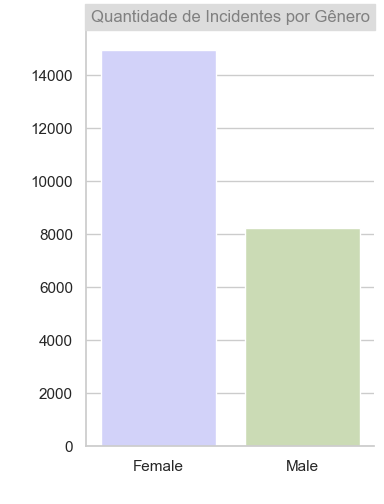

In [335]:
sns.catplot(data = dados, x= 'Gender_class', hue = 'Gender_class', aspect = .8, order = ['Female','Male'], dodge = False, palette = {'Male': "#cce1af", 'Female': "#CCCCFF"}, kind = 'count' ).set_xticklabels(['Female','Male'], ha = 'center')
sns.set(style="whitegrid")
sns.despine()
plt.xlabel(' ')
plt.ylabel(' ')
title = plt.title("Quantidade de Incidentes por Gênero")
title.set_backgroundcolor('gainsboro')
title.set_color('grey')
plt.show()

### 2- Qual faixa etária esteve mais envolvida nos incidentes?

In [225]:
pysqldf = lambda q: sqldf(q, globals())

In [68]:
query = 'SELECT DISTINCT(Age_class), count(Age_class) AS age FROM dados GROUP BY Age_class ORDER BY age DESC'

In [69]:
resultado2 = pysqldf(query)
resultado2

,Age_class,age
0,Adult,17889
1,Elderly,2769
2,Child,2181
3,Youth,319


In [70]:
# a faixa etária com mais incidentes é a "Adult"
resultado2.head(1)

,Age_class,age
0,Adult,17889


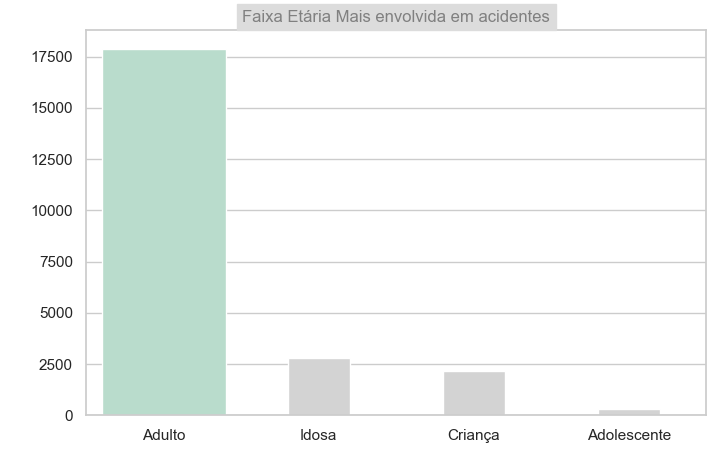

In [331]:
plt.figure(figsize = [8,5])
sns.set_palette("Pastel2")
sns.despine()
ax = sns.countplot(data=dados, x="Age_class", order = dados['Age_class'].value_counts().index )

for p in ax.patches:
    if not(-0.5 <= p.get_x() < 0.0):
        p.set_facecolor('lightgrey')
        title = ax.set_title("Faixa Etária Mais envolvida em acidentes")
        title.set_backgroundcolor('gainsboro')
        title.set_color('grey')
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        ax.set_xticklabels(["Adulto", "Idosa", "Criança",'Adolescente'])
     
        largura = p.get_width()
        nova_largura = largura * 0.5
        x = p.get_x()
        p.set_x(x + (largura - nova_largura) / 2)
        p.set_width(nova_largura)
plt.show()

## Combinando o gênero e idade

In [198]:
Gender_Age_incidentes = dados[['Gender_class','Age_class']].groupby(['Gender_class','Age_class']).size()

In [199]:
Gender_Age_incidentes = Gender_Age_incidentes.unstack()

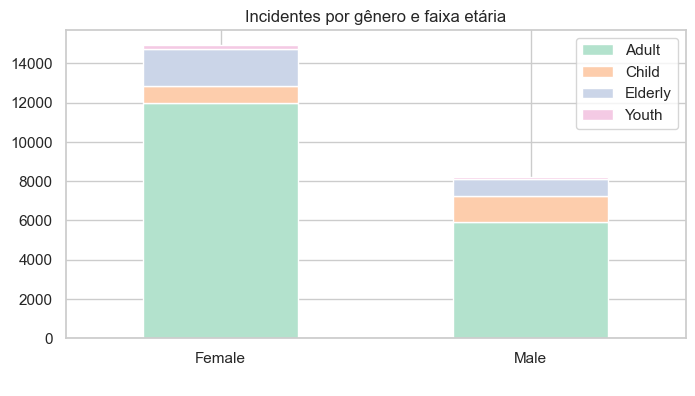

In [332]:
Gender_Age_incidentes.plot.bar(rot=0, stacked = True)
plt.title('Incidentes por gênero e faixa etária')
plt.legend()
plt.xlabel(' ')
plt.show()

In [ ]:
# o número de acidentes na faixa etária "idosa" é maior no público feminino

### 3- Qual o percentual de incidentes por tipo de evento (Incident EventType)?

In [211]:
frequency_relative = dados['Incident_Event_Type'].value_counts(normalize=True)
indexes = [0,1,2,3,4,5,6,7,8,9]

In [212]:
frequency_relative

Slip Trip Fall             0.301451
Onboard Injuries           0.283401
Personal Injury            0.198463
Collision Incident         0.179895
Assault                    0.025477
Activity Incident Event    0.004923
Vandalism Hooliganism      0.003152
Safety Critical Failure    0.002850
Fire                       0.000259
Robbery                    0.000130
Name: Incident_Event_Type, dtype: float64

In [77]:
?plt.margins

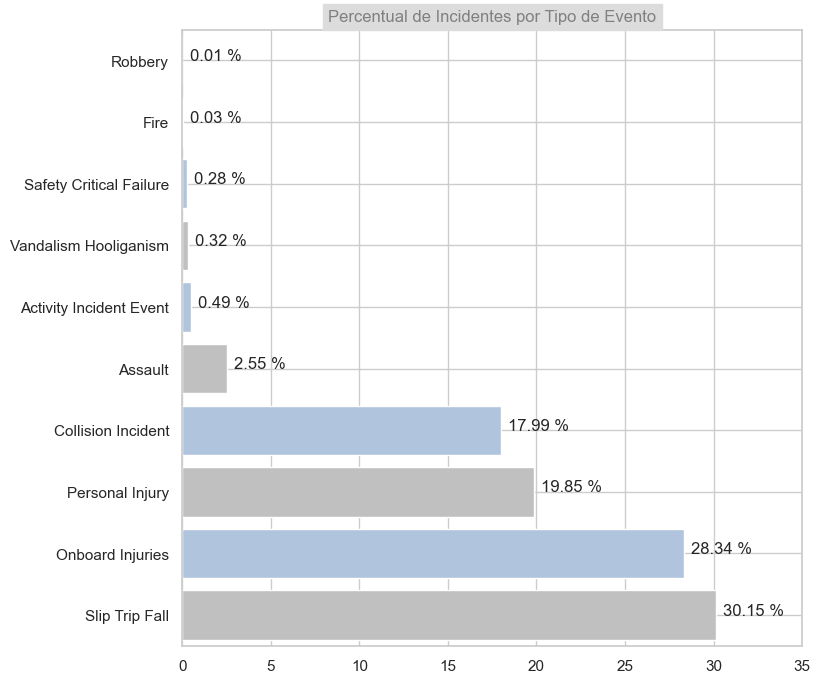

In [327]:
cores = ['silver','lightsteelblue']
plt.figure(figsize = [8,8])
plt.margins(0.2,0.01)
graphic = plt.barh(indexes, frequency_relative * 100, color = cores)
for item in graphic:
    
    largura = item.get_width()
    
    plt.annotate(f'{largura:.2f} %',(largura +.4, item.get_y() + item.get_height() / 2))
    title = plt.title("Percentual de Incidentes por Tipo de Evento")
    title.set_backgroundcolor('gainsboro')
    title.set_color('gray')
plt.xlim(0,35)
plt.yticks(indexes, frequency_relative.index)
plt.show()

O maior tipo de incidente são os incidentes envolvendo escorregões, quedas..

### 4- Como foi a evolução de incidentes por mês ao longo do tempo?

In [223]:
query4 = 'SELECT  DISTINCT(Month) as Mês, count(*) as Incidentes, Year as Ano FROM dados GROUP BY Month, Year'

In [226]:
resultado4 = pysqldf(query4)
resultado4

,Mês,Incidentes,Ano
0,01,399,2015
1,01,466,2016
2,01,435,2017
3,01,547,2018
4,02,371,2015
5,02,484,2016
6,02,487,2017
7,02,507,2018
8,03,460,2015
9,03,449,2016


In [227]:
ordenado = resultado4.sort_values(by=['Ano','Mês'])
ordenado

,Mês,Incidentes,Ano
0,01,399,2015
4,02,371,2015
8,03,460,2015
12,04,470,2015
16,05,472,2015
20,06,564,2015
24,07,558,2015
28,08,446,2015
32,09,487,2015
36,10,470,2015


In [228]:
tabela_final = ordenado.pivot(index = "Mês", columns='Ano', values ='Incidentes')
tabela_final

Ano,2015,2016,2017,2018
Mês,,,,
01,399.0,466.0,435.0,547.0
02,371.0,484.0,487.0,507.0
03,460.0,449.0,579.0,535.0
04,470.0,504.0,563.0,507.0
05,472.0,494.0,510.0,589.0
06,564.0,460.0,516.0,557.0
07,558.0,507.0,650.0,553.0
08,446.0,513.0,563.0,491.0
09,487.0,582.0,549.0,491.0


In [229]:
indices = [0,1,2,3,4,5,6,7,8,9,10,11]
meses = ['Jan', 'Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']

In [120]:
?plt.plot

In [230]:
tabela_final.values

array([[399., 466., 435., 547.],
       [371., 484., 487., 507.],
       [460., 449., 579., 535.],
       [470., 504., 563., 507.],
       [472., 494., 510., 589.],
       [564., 460., 516., 557.],
       [558., 507., 650., 553.],
       [446., 513., 563., 491.],
       [487., 582., 549., 491.],
       [470., 551., 621.,  nan],
       [495., 612., 584.,  nan],
       [523., 471., 516.,  nan]])

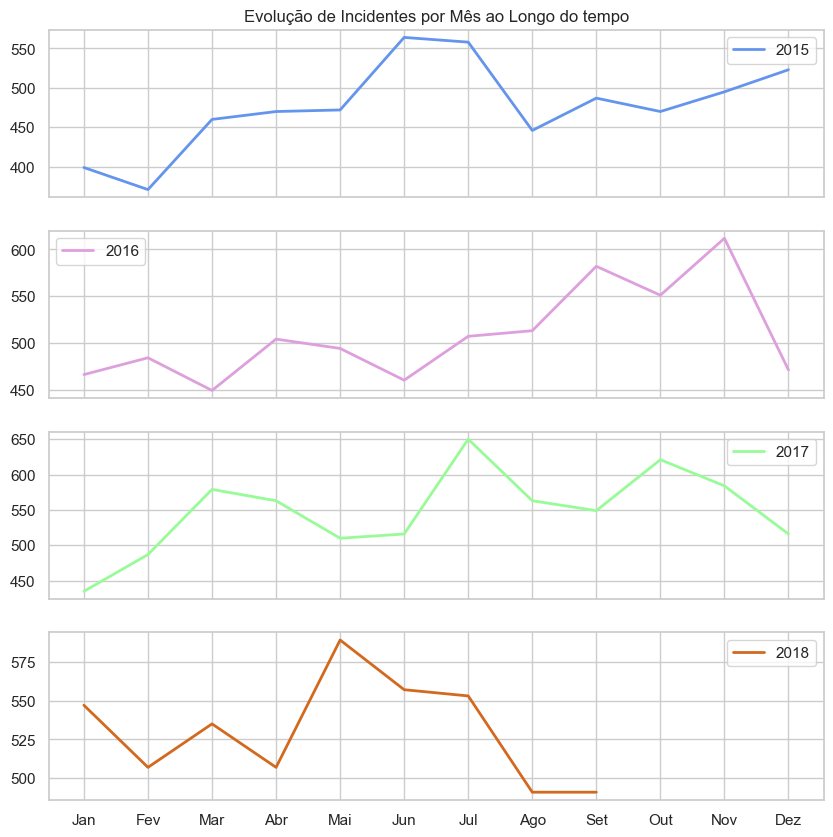

In [233]:
fig, ax = plt.subplots(4,1, figsize= (10,10),sharex= True)
colors = ['cornflowerblue','plum','palegreen','chocolate']
plt.setp(ax, xticks=indices, xticklabels=meses)
for k in range(len(ax)):
    ax[k].plot(tabela_final.columns[k], data=tabela_final, color=colors[k],linewidth=2)   
    title = ax[0].title.set_text('Evolução de Incidentes por Mês ao Longo do tempo')
    ax[k].legend()
    

### 5- Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?

In [234]:
mes5 = 'SELECT Month, count(*) AS qtd FROM dados WHERE Incident_Event_Type = "Collision Incident" AND Gender_class = "Female" GROUP BY Month ORDER BY qtd desc LIMIT 1'

In [235]:
# Mês de julho com mais incidentes envolvendo o gênero feminino com o incidente Colisão
mes_com_mais_femi = pysqldf(mes5)
mes_com_mais_femi

,Month,qtd
0,07,216


In [236]:
query5 = 'SELECT Month, count(*) AS qtd FROM dados WHERE Incident_Event_Type = "Collision Incident" AND Gender_class = "Female" GROUP BY Month ORDER BY qtd desc'

In [237]:
resultado5 = pysqldf(query5)
resultado5

,Month,qtd
0,07,216
1,11,201
2,06,198
3,01,196
4,09,194
5,03,189
6,04,188
7,05,177
8,08,168
9,02,168


In [238]:
resultado5['Month'] = resultado5['Month'].astype(int)

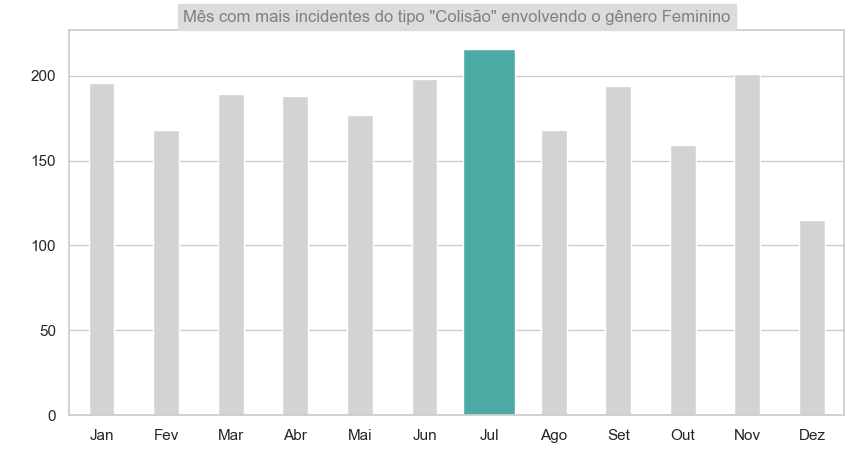

In [243]:
plt.figure(figsize = [10,5])
sns.set_palette("Pastel2")
ax = sns.barplot(data=resultado5, x="Month", y = "qtd")
for p in ax.patches:
    if not(5.0 <= p.get_x() < 6.5):
        p.set_facecolor('lightgrey')
        title = ax.set_title('Mês com mais incidentes do tipo "Colisão" envolvendo o gênero Feminino')
        title.set_backgroundcolor('gainsboro')
        title.set_color("gray")
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        ax.set_xticklabels(["Jan", "Fev", "Mar", "Abr", "Mai","Jun","Jul","Ago","Set","Out","Nov","Dez"])
        largura = p.get_width()
        nova_largura = largura * 0.5
        x = p.get_x()
        p.set_x(x + (largura - nova_largura) / 2)
        p.set_width(nova_largura)
plt.show()

### 6- Qual foi a média de incidentes por mês envolvendo crianças (Child)?

In [244]:
incidentes_crianca = 'SELECT Month, Year, COUNT(*) AS Incidentes FROM dados WHERE Age= "Child" GROUP BY Month, Year'

In [245]:
tabela6 = pysqldf(incidentes_crianca)

In [246]:
tabela6_pivot = tabela6.pivot(index = 'Month', columns = 'Year', values = 'Incidentes')

In [247]:
tabela6_pivot

Year,2015,2016,2017,2018
Month,,,,
01,31.0,36.0,26.0,33.0
02,27.0,31.0,47.0,41.0
03,33.0,35.0,57.0,65.0
04,36.0,58.0,70.0,62.0
05,44.0,49.0,50.0,63.0
06,42.0,64.0,69.0,70.0
07,40.0,54.0,68.0,70.0
08,40.0,44.0,68.0,56.0
09,38.0,57.0,63.0,67.0


In [248]:
tabela6_media = tabela6_pivot.mean(axis = 1)

In [249]:
tabela6_media

Month
01    31.500000
02    36.500000
03    47.500000
04    56.500000
05    51.500000
06    61.250000
07    58.000000
08    52.000000
09    56.250000
10    50.000000
11    40.000000
12    35.666667
dtype: float64

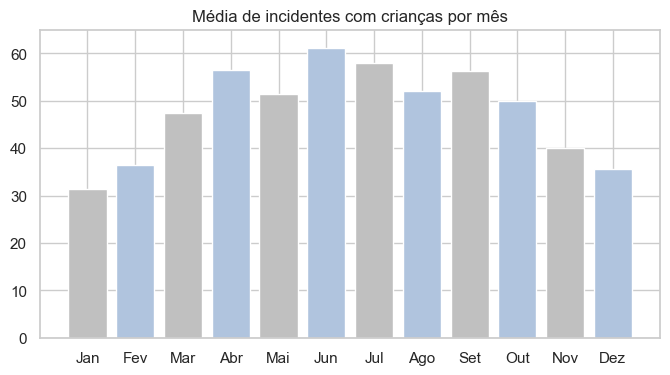

In [329]:
bars = plt.bar(meses, tabela6_media, color = cores)
plt.title('Média de incidentes com crianças por mês')
plt.ylim(0,65)
plt.show()

In [255]:
?plt.bar

### 7- Considerando a descrição de incidente como “Injuries treated on scene”  (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?

In [272]:
result7 = dados.loc[dados['Injury_Result_Description'] == 'Injuries treated on scene'].groupby('Gender_class').size()
result7

Gender_class
Female    11246
Male       6090
dtype: int64

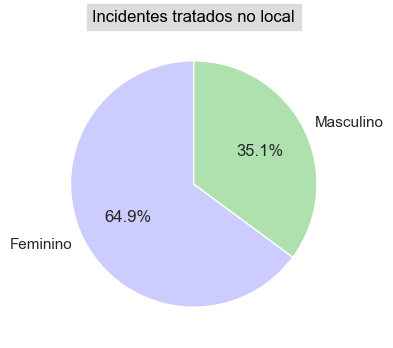

In [284]:
plt.pie(result7, labels = ['Feminino', 'Masculino'], autopct='%1.1f%%',startangle = 90, colors = ['#CCCCFF','#AFE1AF'])
title = plt.title("Incidentes tratados no local")
title.set_backgroundcolor('gainsboro')
title.set_color('black')
plt.show()

In [281]:
?plt.pie

### 8- No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?

In [285]:
exercicio8 = 'SELECT Month, COUNT(*) AS qtd FROM dados WHERE Year = "2017" AND Age_class = "Elderly" GROUP BY Month ORDER BY qtd DESC LIMIT 1'

In [286]:
# Mês de Julho houve mais acidentes com idosos no ano de 2017
pysqldf(exercicio8)

,Month,qtd
0,07,81


In [287]:
exercicio8_grafico = 'SELECT Month, COUNT(*) AS qtd FROM dados WHERE Year = "2017" AND Age_class = "Elderly" GROUP BY Month'
exercicio8_grafico_t = pysqldf(exercicio8_grafico)

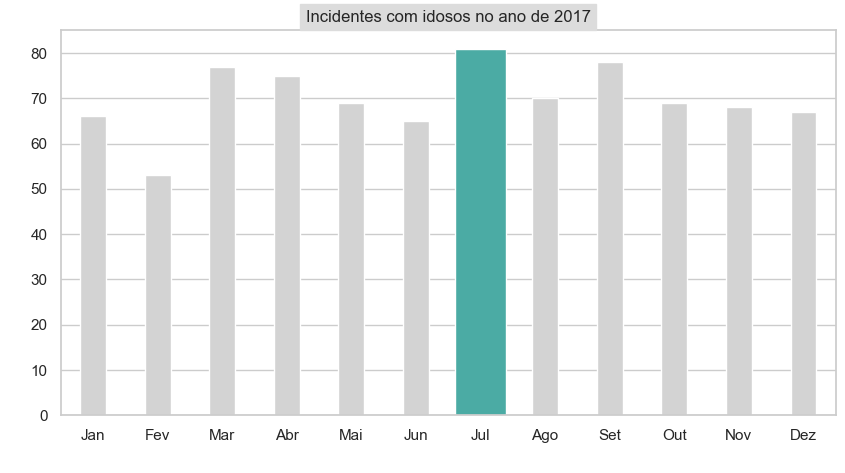

In [325]:
plt.figure(figsize = [10,5])

ax = sns.barplot(data=exercicio8_grafico_t, x="Month", y = "qtd")
for p in ax.patches:
    if not(5.0 <= p.get_x() < 6.5):
        p.set_facecolor('lightgrey')
        title = ax.set_title("Incidentes com idosos no ano de 2017")
        title.set_backgroundcolor('gainsboro')
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        ax.set_xticklabels(["Jan", "Fev", "Mar", "Abr", "Mai","Jun","Jul","Ago","Set","Out","Nov","Dez"])
        largura = p.get_width()
        nova_largura = largura * 0.5
        x = p.get_x()
        p.set_x(x + (largura - nova_largura) / 2)
        p.set_width(nova_largura)
plt.show()

### 9- Considerando o Operador qual a distribuição de incidentes ao longo do tempo?

In [291]:
dados.columns

Index(['Year', 'Month', 'Route', 'Operator', 'Group_Name', 'Bus_Garage',
       'Borough', 'Injury_Result_Description', 'Incident_Event_Type',
       'Victim_Category', 'Gender', 'Age', 'Gender_class', 'Age_class'],
      dtype='object')

In [292]:
dados['Operator'].unique()

array(['London General', 'Metroline', 'East London', 'Selkent',
       'London United', 'London Central', 'Metroline West',
       'Tower Transit', 'Arriva London North', 'Abellio London',
       'Metrobus', 'Arriva London South', 'Arriva The Shires',
       'Arriva Kent Thameside', 'Abellio West', 'Docklands Buses',
       'Blue Triangle Buses', 'H R Richmond', 'C T Plus',
       'London Sovereign', 'TGM GROUP', 'Sullivan Buses', 'Uno Buses',
       'Quality Line', 'Sullivan Bus & Coach'], dtype=object)

In [293]:
dados['Group_Name'].unique()

array(['Go-Ahead', 'Metroline', 'Stagecoach', 'London United',
       'Tower Transit', 'Arriva London', 'Abellio', 'Arriva The Shires',
       'Arriva Kent Thameside', 'Quality Line', 'CT Plus', 'TGM',
       'Sullivan Buses', 'Uno Buses'], dtype=object)

In [294]:
query9 = 'SELECT  DISTINCT(Group_Name) as Grupo_Operador, count(*) as Incidentes,  Year as Ano FROM dados GROUP BY Group_Name'

In [295]:
resultado9 = pysqldf(query9)
resultado9

,Grupo_Operador,Incidentes,Ano
0,Abellio,1089,2015
1,Arriva Kent Thameside,107,2015
2,Arriva London,4945,2015
3,Arriva The Shires,306,2015
4,CT Plus,77,2015
5,Go-Ahead,4258,2015
6,London United,2469,2015
7,Metroline,4690,2015
8,Quality Line,201,2015
9,Stagecoach,4192,2015


In [296]:
ordenado9 = resultado9.sort_values(by=['Incidentes'], ascending = False)
ordenado9

,Grupo_Operador,Incidentes,Ano
2,Arriva London,4945,2015
7,Metroline,4690,2015
5,Go-Ahead,4258,2015
9,Stagecoach,4192,2015
6,London United,2469,2015
0,Abellio,1089,2015
12,Tower Transit,757,2015
3,Arriva The Shires,306,2015
8,Quality Line,201,2015
1,Arriva Kent Thameside,107,2015


In [297]:
ano_2015 = ordenado9[ordenado9['Ano'] == '2015']
ano_2015 = ano_2015.head(10)
ano_2015

,Grupo_Operador,Incidentes,Ano
2,Arriva London,4945,2015
7,Metroline,4690,2015
5,Go-Ahead,4258,2015
9,Stagecoach,4192,2015
6,London United,2469,2015
0,Abellio,1089,2015
12,Tower Transit,757,2015
3,Arriva The Shires,306,2015
8,Quality Line,201,2015
1,Arriva Kent Thameside,107,2015


In [304]:
?plt.barh

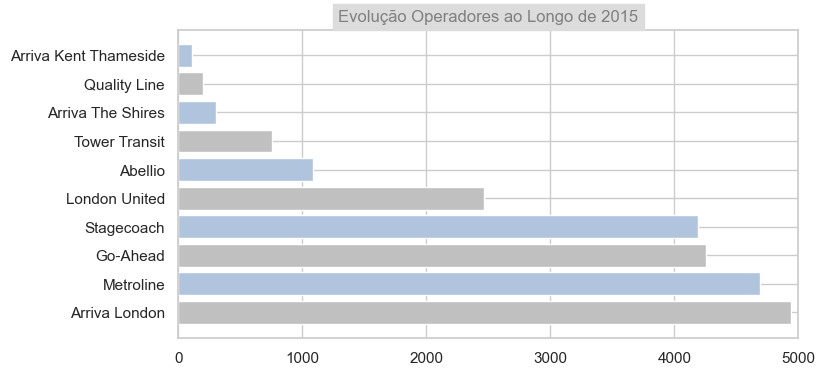

In [316]:
plt.barh(ano_2015['Grupo_Operador'], width = ano_2015['Incidentes'], data = ano_2015, color = cores)
title = plt.title("Evolução Operadores ao Longo de 2015")
title.set_backgroundcolor('gainsboro')
title.set_color("gray")
plt.xlim(0,5000)
plt.show()

### 10- Qual o tipo de incidente mais comum com ciclistas?

In [317]:
exercicio10 = 'SELECT Incident_Event_Type, COUNT(*) AS  Number_Incident FROM  dados WHERE Victim_Category = "Cyclist" GROUP BY Incident_Event_Type ORDER BY Number_Incident DESC LIMIT 1'

In [318]:
pysqldf(exercicio10)

,Incident_Event_Type,Number_Incident
0,Collision Incident,256


In [319]:
exercicio10_TABELA = 'SELECT Incident_Event_Type, COUNT(*) AS  Number_Incident FROM  dados WHERE Victim_Category = "Cyclist" GROUP BY Incident_Event_Type ORDER BY Number_Incident DESC'

In [320]:
exercicio10_T = pysqldf(exercicio10_TABELA)

In [321]:
exercicio10_T

,Incident_Event_Type,Number_Incident
0,Collision Incident,256
1,Personal Injury,8
2,Slip Trip Fall,7
3,Onboard Injuries,4


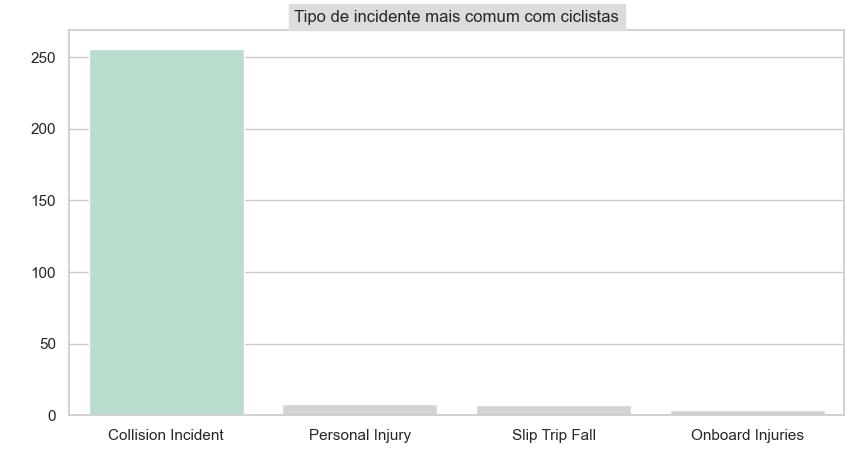

In [333]:
plt.figure(figsize = [10,5])

ax = sns.barplot(data=exercicio10_T, x="Incident_Event_Type", y = "Number_Incident")
for p in ax.patches:
    if not(-0.5 <= p.get_x() < 0):
        p.set_facecolor('lightgrey')
        title = ax.set_title("Tipo de incidente mais comum com ciclistas")
        title.set_backgroundcolor("gainsboro")
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        ax.set_xticklabels(["Collision Incident", "Personal Injury", "Slip Trip Fall", "Onboard Injuries"])
plt.show()